In [1]:
# Import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # visualization library based on matplotlib
from IPython.display import display # Manage multiple output per cell
import datetime
import sqlite3

In [2]:
# Import sickit methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, roc_auc_score
from sklearn.calibration import calibration_curve

In [3]:
# Import model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Import and define deep learning model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
def create_DNN_model(optimizer,nb_feature):
    model = Sequential()
    model.add(Dense(nb_feature, input_dim=nb_feature, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model
def create_DNN_model_adam_all():
    return create_DNN_model('adam',184)
def create_DNN_model_adam_38():
    return create_DNN_model('adam',38)
def create_DNN_model_sgd_all():
    return create_DNN_model('SGD',184)
def create_DNN_model_sgd_56():
    return create_DNN_model('SGD',56)

Using TensorFlow backend.


In [5]:
# Configuration
odd_H = 'INFO_BbAvH'
odd_A = 'INFO_BbAvA'
odd_D = 'INFO_BbAvD'
target = 'INFO_FTR'
start_date = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")
min_odd = 2
max_odd = 4

In [6]:
# Define all different features dataset
raw_features = ["INFO_BbAvH","INFO_BbAvA","INFO_BbAvD", "A_MEANS_FIVE_AC","A_MEANS_FIVE_AF","A_MEANS_FIVE_AR","A_MEANS_FIVE_AS","A_MEANS_FIVE_AST","A_MEANS_FIVE_AY","A_MEANS_FIVE_FTAG","A_MEANS_FIVE_FTHG","A_MEANS_FIVE_FTR_A","A_MEANS_FIVE_FTR_D","A_MEANS_FIVE_FTR_H","A_MEANS_FIVE_HC","A_MEANS_FIVE_HF","A_MEANS_FIVE_HR","A_MEANS_FIVE_HS","A_MEANS_FIVE_HST","A_MEANS_FIVE_HTAG","A_MEANS_FIVE_HTHG","A_MEANS_FIVE_HTR_A","A_MEANS_FIVE_HTR_D","A_MEANS_FIVE_HTR_H","A_MEANS_FIVE_HY","H_MEANS_FIVE_AC","H_MEANS_FIVE_AF","H_MEANS_FIVE_AR","H_MEANS_FIVE_AS","H_MEANS_FIVE_AST","H_MEANS_FIVE_AY","H_MEANS_FIVE_FTAG","H_MEANS_FIVE_FTHG","H_MEANS_FIVE_FTR_A","H_MEANS_FIVE_FTR_D","H_MEANS_FIVE_FTR_H","H_MEANS_FIVE_HC","H_MEANS_FIVE_HF","H_MEANS_FIVE_HR","H_MEANS_FIVE_HS","H_MEANS_FIVE_HST","H_MEANS_FIVE_HTAG","H_MEANS_FIVE_HTHG","H_MEANS_FIVE_HTR_A","H_MEANS_FIVE_HTR_D","H_MEANS_FIVE_HTR_H","H_MEANS_FIVE_HY","A_MEANS_THREE_AC","A_MEANS_THREE_AF","A_MEANS_THREE_AR","A_MEANS_THREE_AS","A_MEANS_THREE_AST","A_MEANS_THREE_AY","A_MEANS_THREE_FTAG","A_MEANS_THREE_FTHG","A_MEANS_THREE_FTR_A","A_MEANS_THREE_FTR_D","A_MEANS_THREE_FTR_H","A_MEANS_THREE_HC","A_MEANS_THREE_HF","A_MEANS_THREE_HR","A_MEANS_THREE_HS","A_MEANS_THREE_HST","A_MEANS_THREE_HTAG","A_MEANS_THREE_HTHG","A_MEANS_THREE_HTR_A","A_MEANS_THREE_HTR_D","A_MEANS_THREE_HTR_H","A_MEANS_THREE_HY","H_MEANS_THREE_AC","H_MEANS_THREE_AF","H_MEANS_THREE_AR","H_MEANS_THREE_AS","H_MEANS_THREE_AST","H_MEANS_THREE_AY","H_MEANS_THREE_FTAG","H_MEANS_THREE_FTHG","H_MEANS_THREE_FTR_A","H_MEANS_THREE_FTR_D","H_MEANS_THREE_FTR_H","H_MEANS_THREE_HC","H_MEANS_THREE_HF","H_MEANS_THREE_HR","H_MEANS_THREE_HS","H_MEANS_THREE_HST","H_MEANS_THREE_HTAG","H_MEANS_THREE_HTHG","H_MEANS_THREE_HTR_A","H_MEANS_THREE_HTR_D","H_MEANS_THREE_HTR_H","H_MEANS_THREE_HY","A_STD_FIVE_AC","A_STD_FIVE_AF","A_STD_FIVE_AR","A_STD_FIVE_AS","A_STD_FIVE_AST","A_STD_FIVE_AY","A_STD_FIVE_FTAG","A_STD_FIVE_FTHG","A_STD_FIVE_FTR_A","A_STD_FIVE_FTR_D","A_STD_FIVE_FTR_H","A_STD_FIVE_HC","A_STD_FIVE_HF","A_STD_FIVE_HR","A_STD_FIVE_HS","A_STD_FIVE_HST","A_STD_FIVE_HTAG","A_STD_FIVE_HTHG","A_STD_FIVE_HTR_A","A_STD_FIVE_HTR_D","A_STD_FIVE_HTR_H","A_STD_FIVE_HY","H_STD_FIVE_AC","H_STD_FIVE_AF","H_STD_FIVE_AR","H_STD_FIVE_AS","H_STD_FIVE_AST","H_STD_FIVE_AY","H_STD_FIVE_FTAG","H_STD_FIVE_FTHG","H_STD_FIVE_FTR_A","H_STD_FIVE_FTR_D","H_STD_FIVE_FTR_H","H_STD_FIVE_HC","H_STD_FIVE_HF","H_STD_FIVE_HR","H_STD_FIVE_HS","H_STD_FIVE_HST","H_STD_FIVE_HTAG","H_STD_FIVE_HTHG","H_STD_FIVE_HTR_A","H_STD_FIVE_HTR_D","H_STD_FIVE_HTR_H","H_STD_FIVE_HY","A_STD_THREE_AC","A_STD_THREE_AF","A_STD_THREE_AR","A_STD_THREE_AS","A_STD_THREE_AST","A_STD_THREE_AY","A_STD_THREE_FTAG","A_STD_THREE_FTHG","A_STD_THREE_FTR_A","A_STD_THREE_FTR_D","A_STD_THREE_FTR_H","A_STD_THREE_HC","A_STD_THREE_HF","A_STD_THREE_HR","A_STD_THREE_HS","A_STD_THREE_HST","A_STD_THREE_HTAG","A_STD_THREE_HTHG","A_STD_THREE_HTR_A","A_STD_THREE_HTR_D","A_STD_THREE_HTR_H","A_STD_THREE_HY","H_STD_THREE_AC","H_STD_THREE_AF","H_STD_THREE_AR","H_STD_THREE_AS","H_STD_THREE_AST","H_STD_THREE_AY","H_STD_THREE_FTAG","H_STD_THREE_FTHG","H_STD_THREE_FTR_A","H_STD_THREE_FTR_D","H_STD_THREE_FTR_H","H_STD_THREE_HC","H_STD_THREE_HF","H_STD_THREE_HR","H_STD_THREE_HS","H_STD_THREE_HST","H_STD_THREE_HTAG","H_STD_THREE_HTHG","H_STD_THREE_HTR_A","H_STD_THREE_HTR_D","H_STD_THREE_HTR_H","H_STD_THREE_HY","INFO_Div"]
all_features = ['A_MEANS_FIVE_AC','A_MEANS_FIVE_AF','A_MEANS_FIVE_AR','A_MEANS_FIVE_AS','A_MEANS_FIVE_AST','A_MEANS_FIVE_AY','A_MEANS_FIVE_FTAG','A_MEANS_FIVE_FTHG','A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_D','A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC','A_MEANS_FIVE_HF','A_MEANS_FIVE_HR','A_MEANS_FIVE_HS','A_MEANS_FIVE_HST','A_MEANS_FIVE_HTAG','A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A','A_MEANS_FIVE_HTR_D','A_MEANS_FIVE_HTR_H','A_MEANS_FIVE_HY','H_MEANS_FIVE_AC','H_MEANS_FIVE_AF','H_MEANS_FIVE_AR','H_MEANS_FIVE_AS','H_MEANS_FIVE_AST','H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_D','H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC','H_MEANS_FIVE_HF','H_MEANS_FIVE_HR','H_MEANS_FIVE_HS','H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTHG','H_MEANS_FIVE_HTR_A','H_MEANS_FIVE_HTR_D','H_MEANS_FIVE_HTR_H','H_MEANS_FIVE_HY','A_MEANS_THREE_AC','A_MEANS_THREE_AF','A_MEANS_THREE_AR','A_MEANS_THREE_AS','A_MEANS_THREE_AST','A_MEANS_THREE_AY','A_MEANS_THREE_FTAG','A_MEANS_THREE_FTHG','A_MEANS_THREE_FTR_A','A_MEANS_THREE_FTR_D','A_MEANS_THREE_FTR_H','A_MEANS_THREE_HC','A_MEANS_THREE_HF','A_MEANS_THREE_HR','A_MEANS_THREE_HS','A_MEANS_THREE_HST','A_MEANS_THREE_HTAG','A_MEANS_THREE_HTHG','A_MEANS_THREE_HTR_A','A_MEANS_THREE_HTR_D','A_MEANS_THREE_HTR_H','A_MEANS_THREE_HY','H_MEANS_THREE_AC','H_MEANS_THREE_AF','H_MEANS_THREE_AR','H_MEANS_THREE_AS','H_MEANS_THREE_AST','H_MEANS_THREE_AY','H_MEANS_THREE_FTAG','H_MEANS_THREE_FTHG','H_MEANS_THREE_FTR_A','H_MEANS_THREE_FTR_D','H_MEANS_THREE_FTR_H','H_MEANS_THREE_HC','H_MEANS_THREE_HF','H_MEANS_THREE_HR','H_MEANS_THREE_HS','H_MEANS_THREE_HST','H_MEANS_THREE_HTAG','H_MEANS_THREE_HTHG','H_MEANS_THREE_HTR_A','H_MEANS_THREE_HTR_D','H_MEANS_THREE_HTR_H','H_MEANS_THREE_HY','A_STD_FIVE_AC','A_STD_FIVE_AF','A_STD_FIVE_AR','A_STD_FIVE_AS','A_STD_FIVE_AST','A_STD_FIVE_AY','A_STD_FIVE_FTAG','A_STD_FIVE_FTHG','A_STD_FIVE_FTR_A','A_STD_FIVE_FTR_D','A_STD_FIVE_FTR_H','A_STD_FIVE_HC','A_STD_FIVE_HF','A_STD_FIVE_HR','A_STD_FIVE_HS','A_STD_FIVE_HST','A_STD_FIVE_HTAG','A_STD_FIVE_HTHG','A_STD_FIVE_HTR_A','A_STD_FIVE_HTR_D','A_STD_FIVE_HTR_H','A_STD_FIVE_HY','H_STD_FIVE_AC','H_STD_FIVE_AF','H_STD_FIVE_AR','H_STD_FIVE_AS','H_STD_FIVE_AST','H_STD_FIVE_AY','H_STD_FIVE_FTAG','H_STD_FIVE_FTHG','H_STD_FIVE_FTR_A','H_STD_FIVE_FTR_D','H_STD_FIVE_FTR_H','H_STD_FIVE_HC','H_STD_FIVE_HF','H_STD_FIVE_HR','H_STD_FIVE_HS','H_STD_FIVE_HST','H_STD_FIVE_HTAG','H_STD_FIVE_HTHG','H_STD_FIVE_HTR_A','H_STD_FIVE_HTR_D','H_STD_FIVE_HTR_H','H_STD_FIVE_HY','A_STD_THREE_AC','A_STD_THREE_AF','A_STD_THREE_AR','A_STD_THREE_AS','A_STD_THREE_AST','A_STD_THREE_AY','A_STD_THREE_FTAG','A_STD_THREE_FTHG','A_STD_THREE_FTR_A','A_STD_THREE_FTR_D','A_STD_THREE_FTR_H','A_STD_THREE_HC','A_STD_THREE_HF','A_STD_THREE_HR','A_STD_THREE_HS','A_STD_THREE_HST','A_STD_THREE_HTAG','A_STD_THREE_HTHG','A_STD_THREE_HTR_A','A_STD_THREE_HTR_D','A_STD_THREE_HTR_H','A_STD_THREE_HY','H_STD_THREE_AC','H_STD_THREE_AF','H_STD_THREE_AR','H_STD_THREE_AS','H_STD_THREE_AST','H_STD_THREE_AY','H_STD_THREE_FTAG','H_STD_THREE_FTHG','H_STD_THREE_FTR_A','H_STD_THREE_FTR_D','H_STD_THREE_FTR_H','H_STD_THREE_HC','H_STD_THREE_HF','H_STD_THREE_HR','H_STD_THREE_HS','H_STD_THREE_HST','H_STD_THREE_HTAG','H_STD_THREE_HTHG','H_STD_THREE_HTR_A','H_STD_THREE_HTR_D','H_STD_THREE_HTR_H','H_STD_THREE_HY','INFO_Div_D1','INFO_Div_E0','INFO_Div_E1','INFO_Div_E2','INFO_Div_F1','INFO_Div_I1','INFO_Div_SC0','INFO_Div_SP1']
best_features_DNN_adam_38 = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF', 'A_MEANS_FIVE_HS','A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTR_H','A_MEANS_THREE_AC', 'A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG','A_MEANS_THREE_HF', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','H_MEANS_THREE_HC', 'A_STD_FIVE_AST', 'A_STD_FIVE_HF','H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_HC', 'H_STD_FIVE_HF','H_STD_FIVE_HST']
best_features_DNN_SGD_56 = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_FTR_A', 'A_MEANS_THREE_HC','A_MEANS_THREE_HF', 'A_MEANS_THREE_HS', 'A_MEANS_THREE_HST','H_MEANS_THREE_AC', 'H_MEANS_THREE_AS', 'H_MEANS_THREE_FTHG','H_MEANS_THREE_HC', 'H_MEANS_THREE_HST', 'H_MEANS_THREE_HTR_H','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']
best_features_XGBoost_60 = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_AY', 'A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG','A_MEANS_FIVE_FTR_A', 'A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC','A_MEANS_FIVE_HF', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTHG', 'A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC','H_MEANS_FIVE_HF', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG', 'H_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_HTR_H','A_MEANS_THREE_AC', 'A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG','A_MEANS_THREE_FTR_A', 'A_MEANS_THREE_HC', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'A_MEANS_THREE_HST', 'H_MEANS_THREE_AC','H_MEANS_THREE_AS', 'H_MEANS_THREE_AST', 'H_MEANS_THREE_FTHG','H_MEANS_THREE_HC', 'H_MEANS_THREE_HST', 'H_MEANS_THREE_HTR_H','A_STD_FIVE_AF', 'A_STD_FIVE_AS', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC','A_STD_FIVE_HF', 'A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS','H_STD_FIVE_AST', 'H_STD_FIVE_HC', 'H_STD_FIVE_HF','H_STD_FIVE_HST', 'H_STD_FIVE_HTHG', 'H_STD_THREE_AS','H_STD_THREE_HST']
best_features_SVM = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS','H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','A_STD_FIVE_HF', 'H_STD_FIVE_HC', 'H_STD_FIVE_HST']
best_features_RF = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HC', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'H_MEANS_THREE_AC', 'H_MEANS_THREE_AS','H_MEANS_THREE_FTHG', 'H_MEANS_THREE_HC', 'H_MEANS_THREE_HST','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']
best_features_NB = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS','H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','A_STD_FIVE_HF', 'H_STD_FIVE_HC', 'H_STD_FIVE_HST']
best_features_MLP = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS','H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS', 'H_MEANS_THREE_AS','A_STD_FIVE_HF', 'H_STD_FIVE_HC', 'H_STD_FIVE_HST']
best_features_LDA = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AS', 'A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_HC','A_MEANS_FIVE_HS', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS','H_MEANS_FIVE_HST']
best_features_KNN = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS','A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','A_MEANS_THREE_AS', 'A_MEANS_THREE_HS', 'A_STD_FIVE_HF']
best_features_ExraTree = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_FTR_A', 'A_MEANS_THREE_HC','A_MEANS_THREE_HF', 'A_MEANS_THREE_HS', 'A_MEANS_THREE_HST','H_MEANS_THREE_AC', 'H_MEANS_THREE_AS', 'H_MEANS_THREE_FTHG','H_MEANS_THREE_HC', 'H_MEANS_THREE_HST', 'H_MEANS_THREE_HTR_H','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']
best_features_ElasticNEt = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS','H_MEANS_FIVE_HST', 'A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG','A_MEANS_THREE_HS', 'A_STD_FIVE_HF', 'H_STD_FIVE_HST']
best_features_bagging = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST', 'A_MEANS_FIVE_FTAG','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','A_MEANS_THREE_HS']
best_features_AdaBoost = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HS','H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC','A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HS','H_MEANS_THREE_AS', 'H_MEANS_THREE_HC', 'A_STD_FIVE_AST','A_STD_FIVE_HF', 'H_STD_FIVE_AF', 'H_STD_FIVE_HC','H_STD_FIVE_HST']
best_features_LR = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF', 'A_MEANS_FIVE_HS','A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY','H_MEANS_FIVE_AC', 'H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST','H_MEANS_FIVE_AY', 'H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A', 'H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC','H_MEANS_FIVE_HF', 'H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG', 'H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC','A_MEANS_THREE_AS', 'A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'H_MEANS_THREE_AS', 'H_MEANS_THREE_HC','A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF', 'A_STD_FIVE_HS','H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST', 'H_STD_FIVE_HC','H_STD_FIVE_HF', 'H_STD_FIVE_HST']
best_features_GB = ['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD','A_MEANS_FIVE_AC', 'A_MEANS_FIVE_AS', 'A_MEANS_FIVE_AST','A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_FTHG', 'A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_H', 'A_MEANS_FIVE_HC', 'A_MEANS_FIVE_HF','A_MEANS_FIVE_HS', 'A_MEANS_FIVE_HST', 'A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A', 'A_MEANS_FIVE_HY', 'H_MEANS_FIVE_AC','H_MEANS_FIVE_AS', 'H_MEANS_FIVE_AST', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG', 'H_MEANS_FIVE_FTHG', 'H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_H', 'H_MEANS_FIVE_HC', 'H_MEANS_FIVE_HF','H_MEANS_FIVE_HS', 'H_MEANS_FIVE_HST', 'H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H', 'A_MEANS_THREE_AC', 'A_MEANS_THREE_AS','A_MEANS_THREE_FTHG', 'A_MEANS_THREE_HC', 'A_MEANS_THREE_HF','A_MEANS_THREE_HS', 'H_MEANS_THREE_AC', 'H_MEANS_THREE_AS','H_MEANS_THREE_FTHG', 'H_MEANS_THREE_HC', 'H_MEANS_THREE_HST','A_STD_FIVE_AF', 'A_STD_FIVE_AST', 'A_STD_FIVE_HC', 'A_STD_FIVE_HF','A_STD_FIVE_HS', 'H_STD_FIVE_AF', 'H_STD_FIVE_AS', 'H_STD_FIVE_AST','H_STD_FIVE_HC', 'H_STD_FIVE_HF', 'H_STD_FIVE_HST','H_STD_FIVE_HTHG', 'H_STD_THREE_AS', 'H_STD_THREE_HST']

In [7]:
# Construct layer 1
# [Model_name, Preprocessing_needed, calibration, model_with_hyperparameter, feature_list]
layer_1 = [
    ['XGBoost_bf', False, 'no', XGBClassifier(learning_rate =0.01,n_estimators=207,max_depth=3,min_child_weight=3,gamma=0.4,subsample=0.65,colsample_bytree=0.85,objective= 'multi:softprob',nthread=4,scale_pos_weight=1,seed=15), best_features_XGBoost_60],
    ['RF_bf', False, 'no', RandomForestClassifier(random_state=0, n_jobs=-1,criterion='entropy', max_depth=5, max_features='sqrt', min_samples_leaf=4, min_samples_split=23, n_estimators=620), best_features_RF],
    ['NB', True, 'no', GaussianNB(), best_features_NB],
    ['MLP', True, 'no', MLPClassifier(random_state=0,activation='logistic', alpha=1, hidden_layer_sizes=(100,), max_iter=200, solver= 'sgd'), best_features_MLP],
    ['KNN', True, 'no', KNeighborsClassifier(n_jobs=-1,n_neighbors=650, p=2, weights='uniform'), best_features_KNN],
]

In [8]:
# Import and Prepare dataset
# DB Sqlite connection
db = "/Users/thibaultclement/Project/ligue1-predict/src/notebook/data/db/soccer_predict.sqlite"
conn = sqlite3.connect(db)
cur = conn.cursor()
# Get all prematch data
df = pd.read_sql_query("SELECT * FROM pre_matchs ORDER BY INFO_Date ASC;", conn)
df = (df[df.columns.drop(['index'])])
# Create a INFO_WIN column containing the gain if you bet the good result
df['INFO_WIN'] = 0
df.loc[df.INFO_FTR == 'H', 'INFO_WIN'] = df[odd_H]
df.loc[df.INFO_FTR == 'A', 'INFO_WIN'] = df[odd_A]
df.loc[df.INFO_FTR == 'D', 'INFO_WIN'] = df[odd_D]
df['INFO_WIN_P'] = 0
df.loc[df.INFO_FTR == 'H', 'INFO_WIN_P'] = df['INFO_PSH']
df.loc[df.INFO_FTR == 'A', 'INFO_WIN_P'] = df['INFO_PSA']
df.loc[df.INFO_FTR == 'D', 'INFO_WIN_P'] = df['INFO_PSD']
df[[odd_H, odd_D, odd_A, 'INFO_FTR', 'INFO_WIN']].head(10)
# Remove all game between June (include) and October (include)
df['INFO_Date'] = pd.to_datetime(df['INFO_Date'])
df['INFO_Date'].dt.month
df = df[(df['INFO_Date'].dt.month < 6) | (df['INFO_Date'].dt.month > 10)]
# Shuffle dataset
df_all = pd.get_dummies(df.sample(frac=1))
# Split in train and test set
train_df, test_df = train_test_split(df, test_size = 0.3)
train_df = train_df.reset_index()
test_df = test_df.reset_index()
# Remove too small and too high odd for training dataset
train_df_range = train_df[(train_df[odd_H] > min_odd) & (train_df[odd_A] > min_odd)]
train_df_range = train_df[(train_df[odd_H] < max_odd) & (train_df[odd_A] < max_odd)]
# Encode string label
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df[target])
# Create X and y for train and test set
X_train_df = pd.get_dummies(train_df[raw_features])
X_train_df_range = pd.get_dummies(train_df_range[raw_features])
X_test_df = pd.get_dummies(test_df[raw_features])
y_train_df = le.transform(train_df[target])
y_train_df_range = le.transform(train_df_range[target])
y_test_df= le.transform(test_df[target])
# Impute of missing values (NaN) with the mean
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(X_train_df)
X_imputed = imp.transform(X_train_df)
X_train_df = pd.DataFrame(X_imputed, columns = X_train_df.columns)
X_imputed = imp.transform(X_train_df_range)
X_train_df_range = pd.DataFrame(X_imputed, columns = X_train_df_range.columns)
X_imputed = imp.transform(X_test_df)
X_test_df = pd.DataFrame(X_imputed, columns = X_test_df.columns)

In [9]:
from sklearn.cross_validation import KFold
ntrain = X_train_df.shape[0]
#ntrain_range = X_train_df_range.shape[0]
ntest = X_test_df.shape[0]
NFOLDS = 4
kf = KFold(ntrain, n_folds=NFOLDS, shuffle=True, random_state=0)
#kf_range = KFold(ntrain_range, n_folds=NFOLDS, shuffle=True, random_state=0)

In [10]:
def get_oof(clf, x_train, x_test, kf_param):
    oof_train = np.zeros((x_train.shape[0],3))
    oof_test = np.zeros((x_test.shape[0],3))
    oof_test_skf = np.empty((NFOLDS, x_test.shape[0], 3))

    for i, (train_index, test_index) in enumerate(kf_param):
        x_tr = x_train[train_index]
        y_tr = y_train_df[train_index]
        x_te = x_train[test_index]
        # Calibrate model
        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict_proba(x_te)
        oof_test_skf[i, :] = clf.predict_proba(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train, oof_test

In [11]:
# Compute out-of-fold predictions for layer 1 
start = datetime.datetime.now()

# Create column name of df
cols = []
for clf_name, preprocessing, calibration, clf, features in layer_1:
    for result in le.classes_:
        cols.append(clf_name+result)

# Keep prediction of test in array
X_train_layer2 = np.zeros((X_train_df.shape[0], len(layer_1)*3))
X_train_layer2 = pd.DataFrame(X_train_layer2, columns=cols)

X_test_layer2 = np.zeros((X_test_df.shape[0], len(layer_1)*3))
X_test_layer2 = pd.DataFrame(X_test_layer2, columns=cols)

for clf_name, preprocessing, calibration, classifier, features in layer_1:
    print "Processing model:",clf_name
    # Check if we need to standardize X for this model
    if preprocessing:
        sc_X = StandardScaler().fit(X_train_df[features])
        X_train_model = sc_X.transform(X_train_df[features])
        X_test_model = sc_X.transform(X_test_df[features])
    else:
        X_train_model = X_train_df[features].as_matrix()
        X_test_model = X_test_df[features].as_matrix()
    # Check if we need to recalibrate the prediction
    if calibration == 'sigmoid':
        clf = CalibratedClassifierCV(classifier, cv=4, method='sigmoid')
    elif calibration == 'isotonic':
        clf = CalibratedClassifierCV(classifier, cv=4, method='isotonic')
    elif calibration == 'no':
        clf = classifier
    # obtain out-of-fold predictions for this model
    oof_train, oof_test = get_oof(clf, X_train_model, X_test_model, kf)
    X_train_layer2.loc[:, [clf_name+result for result in le.classes_]] = oof_train
    X_test_layer2.loc[:, [clf_name+result for result in le.classes_]] = oof_test
X_train_layer2.to_csv('./report/'+start.strftime("%Y-%m-%d-%H-%M")+'-layer1-train-pred.csv')
X_test_layer2.to_csv('./report/'+start.strftime("%Y-%m-%d-%H-%M")+'-layer1-test-pred.csv')

print("Finish after %d seconds" % (datetime.datetime.now() - start).total_seconds())


Processing model: XGBoost_bf
Processing model: RF_bf
Processing model: NB
Processing model: MLP
Processing model: KNN
Finish after 121 seconds


In [12]:
# Concat prediction with initial features
#X_train_layer2_df_temp = X_train_layer2
#X_test_layer2_df_temp = X_test_layer2

In [13]:
# Concat prediction with initial features
X_train_layer2_df = pd.concat([train_df, X_train_layer2, pd.DataFrame(y_train_df)], axis=1)
X_test_layer2_df = pd.concat([test_df, X_test_layer2, pd.DataFrame(y_test_df)], axis=1)
X_train_layer2_df.to_csv('./report/layer2-train-'+target+'-'+start.strftime("%Y-%m-%d-%H-%M")+'.csv')
X_test_layer2_df.to_csv('./report/layer2-test-'+target+'-'+start.strftime("%Y-%m-%d-%H-%M")+'.csv')

In [14]:
# 
# # Compute out-of-fold predictions for layer 1 with H and A odd between 2 and 4
# start = datetime.datetime.now()
# 
# # Create column name of df
# cols = []
# for clf_name, preprocessing, calibration, clf, features in layer_1:
#     for result in le.classes_:
#         cols.append(clf_name+result)
# 
# # Keep prediction of test in array
# X_train_layer2 = np.zeros((X_train_df_range.shape[0], len(layer_1)*3))
# X_train_layer2 = pd.DataFrame(X_train_layer2, columns=cols)
# 
# X_test_layer2 = np.zeros((X_test_df.shape[0], len(layer_1)*3))
# X_test_layer2 = pd.DataFrame(X_test_layer2, columns=cols)
# 
# for clf_name, preprocessing, calibration, classifier, features in layer_1:
#     print "Processing model:",clf_name
#     # Check if we need to standardize X for this model
#     if preprocessing:
#         sc_X = StandardScaler().fit(X_train_df_range[features])
#         X_train_model = sc_X.transform(X_train_df_range[features])
#         X_test_model = sc_X.transform(X_test_df[features])
#     else:
#         X_train_model = X_train_df_range[features].as_matrix()
#         X_test_model = X_test_df[features].as_matrix()
#     # Check if we need to recalibrate the prediction
#     if calibration == 'sigmoid':
#         clf = CalibratedClassifierCV(classifier, cv=4, method='sigmoid')
#     elif calibration == 'isotonic':
#         clf = CalibratedClassifierCV(classifier, cv=4, method='isotonic')
#     elif calibration == 'no':
#         clf = classifier
#     # obtain out-of-fold predictions for this model
#     oof_train, oof_test = get_oof(clf, X_train_model, X_test_model, kf_range)
#     X_train_layer2.loc[:, [clf_name+result for result in le.classes_]] = oof_train
#     X_test_layer2.loc[:, [clf_name+result for result in le.classes_]] = oof_test
# X_train_layer2.to_csv('./report/'+start.strftime("%Y-%m-%d-%H-%M")+'-layer1-train-pred.csv')
# X_test_layer2.to_csv('./report/'+start.strftime("%Y-%m-%d-%H-%M")+'-layer1-test-pred.csv')
# 
# print("Finish after %d seconds" % (datetime.datetime.now() - start).total_seconds())


In [15]:
# Concat prediction with initial features
#X_train_layer2_df = pd.concat([train_df, X_train_layer2_df_temp, X_train_layer2, pd.DataFrame(y_train_df)], axis=1)
#X_test_layer2_df = pd.concat([test_df, X_test_layer2_df_temp, X_test_layer2, pd.DataFrame(y_test_df)], axis=1)
#X_train_layer2_df.to_csv('./report/layer2-train-'+target+'-'+start.strftime("%Y-%m-%d-%H-%M")+'.csv')
#X_test_layer2_df.to_csv('./report/layer2-test-'+target+'-'+start.strftime("%Y-%m-%d-%H-%M")+'.csv')

In [16]:
y_train_df

array([1, 0, 1, ..., 0, 0, 1])

In [17]:
#X_layer2_train = X_train_layer2
#X_layer2_test = X_test_layer2

#X_layer2_train = pd.concat([X_train_df, X_train_layer2], axis=1)
#X_layer2_test = pd.concat([X_test_df, X_test_layer2], axis=1)

#X_layer2_train = pd.concat([X_train_df[best_features_NB], X_train_layer2], axis=1)
#X_layer2_test = pd.concat([X_test_df[best_features_NB], X_test_layer2], axis=1)

X_layer2_train = pd.concat([X_train_df[['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD']], X_train_layer2], axis=1)
X_layer2_test = pd.concat([X_test_df[['INFO_BbAvH','INFO_BbAvA','INFO_BbAvD']], X_test_layer2], axis=1)

In [18]:
#clf2 = XGBClassifier()
#clf2 = XGBClassifier(learning_rate =0.01,n_estimators=572,max_depth=3,min_child_weight=5,gamma=0,subsample=0.9,colsample_bytree=0.9,objective= 'multi:softprob',nthread=4,scale_pos_weight=1,seed=15) 
clf2 = XGBClassifier(learning_rate =0.01,n_estimators=207,max_depth=3,min_child_weight=3,gamma=0.4,subsample=0.65,colsample_bytree=0.85,objective= 'multi:softprob',nthread=4,scale_pos_weight=1,seed=15)
#clf2 = ExtraTreesClassifier(random_state=0,n_jobs=-1,criterion='entropy',max_depth=30,max_features=None,min_samples_leaf=1,min_samples_split=16,n_estimators=350)
#clf2 = MLPClassifier(random_state=0,activation='logistic', alpha=1, hidden_layer_sizes=(100,), max_iter=500, solver= 'sgd')
#clf2 = GaussianNB()
#clf2 = LogisticRegression()
clf2.fit(X_layer2_train, y_train_df)
layer2_pred = clf2.predict(X_layer2_test)
layer2_pred_probs = clf2.predict_proba(X_layer2_test)

In [19]:
# Add all betting information back to the predic dataset
X_test_layer2_df['pred'] = le.inverse_transform(layer2_pred)

X_test_layer2_df['probs_A'] = layer2_pred_probs[:,0]
X_test_layer2_df['probs_D'] = layer2_pred_probs[:,1]
X_test_layer2_df['probs_H'] = layer2_pred_probs[:,2]
X_test_layer2_df['probs'] = X_test_layer2_df[['probs_A','probs_D','probs_H']].max(axis=1)

X_test_layer2_df['GOOD'] = False
X_test_layer2_df.loc[X_test_layer2_df.INFO_FTR == X_test_layer2_df.pred, 'GOOD'] = True

X_test_layer2_df['WIN'] = -1
X_test_layer2_df.loc[X_test_layer2_df.INFO_FTR == X_test_layer2_df.pred, 'WIN'] = X_test_layer2_df['INFO_WIN']-1

X_test_layer2_df['WIN_P'] = -1
X_test_layer2_df.loc[X_test_layer2_df.INFO_FTR == X_test_layer2_df.pred, 'WIN_P'] = X_test_layer2_df['INFO_WIN_P']-1

X_test_layer2_df['INFO_ODD_BET'] = 0
X_test_layer2_df.loc[X_test_layer2_df.pred == 'A', 'INFO_ODD_BET'] = X_test_layer2_df[odd_A]
X_test_layer2_df.loc[X_test_layer2_df.pred == 'D', 'INFO_ODD_BET'] = X_test_layer2_df[odd_D]
X_test_layer2_df.loc[X_test_layer2_df.pred == 'H', 'INFO_ODD_BET'] = X_test_layer2_df[odd_H]

X_test_layer2_df['prob_less_bet'] = 0
X_test_layer2_df.loc[X_test_layer2_df.pred == 'A', 'prob_less_bet'] = X_test_layer2_df['probs'] - X_test_layer2_df[odd_A].apply(lambda x: 1/x)
X_test_layer2_df.loc[X_test_layer2_df.pred == 'D', 'prob_less_bet'] = X_test_layer2_df['probs'] - X_test_layer2_df[odd_D].apply(lambda x: 1/x)
X_test_layer2_df.loc[X_test_layer2_df.pred == 'H', 'prob_less_bet'] = X_test_layer2_df['probs'] - X_test_layer2_df[odd_H].apply(lambda x: 1/x)

In [20]:
# Compute cross-entropy score
from sklearn.metrics import log_loss
log_loss(y_test_df, layer2_pred_probs)

0.98733840134827477

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_df, layer2_pred)

0.52523571824736548

In [22]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test_df, layer2_pred, target_names=['A', 'D', 'H']))

             precision    recall  f1-score   support

          A       0.48      0.49      0.49      1585
          D       0.25      0.00      0.00      1310
          H       0.54      0.82      0.65      2514

avg / total       0.45      0.53      0.45      5409



In [34]:
# Remove games I didn't bet on
df_bet_test_season = X_test_layer2_df
#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.probs <= 0.4].index)

df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.pred != 'H'].index)
#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.pred == 'D'].index)

#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.prob_less_bet <= 0].index)
#df_bet_test_season = df_bet_test_season[df_bet_test_season.prob_less_bet > -0.2]

#df_bet_test_season = df_bet_test_season[df_bet_test_season['INFO_ODD_BET'] > 1.3]
df_bet_test_season = df_bet_test_season[df_bet_test_season['INFO_ODD_BET'] < 1.9]

df_bet_test_season = df_bet_test_season[(df_bet_test_season['INFO_Date'].dt.year < 2018) & (df_bet_test_season['INFO_Date'].dt.year > 2013)]

#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[(df_bet_test_season.A_MEANS_FIVE_FTHG - df_bet_test_season.A_MEANS_FIVE_FTAG) > 0.8].index)
#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[(df_bet_test_season.A_MEANS_FIVE_FTAG - df_bet_test_season.A_MEANS_FIVE_FTHG) > 0.8].index)
#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.A_MEANS_FIVE_FTHG > 3].index)
#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.A_MEANS_FIVE_FTAG < 1].index)
#df_bet_test_season = df_bet_test_season.drop(df_bet_test_season[df_bet_test_season.A_MEANS_FIVE_FTAG > 3].index)

In [35]:
# Number of games in the test set
df_bet_test_season.shape

(831, 219)

In [36]:
# What will be the real result of games I bet on
display(plt.show(), 100. * df_bet_test_season.INFO_FTR.value_counts() / len(df_bet_test_season.INFO_FTR))

None

H    66.666667
D    19.013237
A    14.320096
Name: INFO_FTR, dtype: float64

In [37]:
# What will I bet on
display(plt.show(), 100. * df_bet_test_season.pred.value_counts() / len(df_bet_test_season.pred))

None

H    100.0
Name: pred, dtype: float64

In [38]:
# How good I will be
display(plt.show(), 100. * df_bet_test_season.GOOD.value_counts() / len(df_bet_test_season.GOOD))

None

True     66.666667
False    33.333333
Name: GOOD, dtype: float64

In [39]:
df_bet_test_season.probs.mean()

0.5939700603485107

In [40]:
df_bet_test_season.INFO_WIN.mean()

2.658194945848375

In [41]:
# What I win/lost on each match
df_bet_test_season.WIN.mean()

0.015090252707581246

In [42]:
# What I win/lost on each match with pinnacle
df_bet_test_season.dropna().WIN_P.mean()

0.028089480048367615

In [43]:
df_bet_test_season[['INFO_Date', 'probs_A','probs_D','probs_H', 'probs', 'prob_less_bet', 'pred', 'INFO_FTR', 'INFO_ODD_BET', 'WIN', 'WIN_P']]

,INFO_Date,probs_A,probs_D,probs_H,probs,prob_less_bet,pred,INFO_FTR,INFO_ODD_BET,WIN,WIN_P
2,2016-03-05,0.230354,0.250427,0.519218,0.519218,-0.065577,H,D,1.71,-1.00,-1.00
4,2015-04-28,0.095603,0.108082,0.796315,0.796315,-0.165223,H,H,1.04,0.04,0.06
15,2014-02-22,0.158431,0.249763,0.591805,0.591805,-0.112420,H,H,1.42,0.42,0.45
33,2014-02-11,0.235984,0.278648,0.485368,0.485368,-0.079604,H,A,1.77,-1.00,-1.00
40,2014-02-15,0.162275,0.250612,0.587113,0.587113,-0.062237,H,A,1.54,-1.00,-1.00
46,2014-03-29,0.240143,0.255462,0.504395,0.504395,-0.051160,H,D,1.80,-1.00,-1.00
55,2014-11-23,0.231699,0.269124,0.499176,0.499176,-0.047272,H,A,1.83,-1.00,-1.00
58,2015-03-01,0.167035,0.263386,0.569579,0.569579,-0.063332,H,H,1.58,0.58,0.58
61,2014-03-22,0.227286,0.268978,0.503736,0.503736,-0.074299,H,A,1.73,-1.00,-1.00
67,2016-01-18,0.233635,0.269611,0.496755,0.496755,-0.061904,H,H,1.79,0.79,0.81


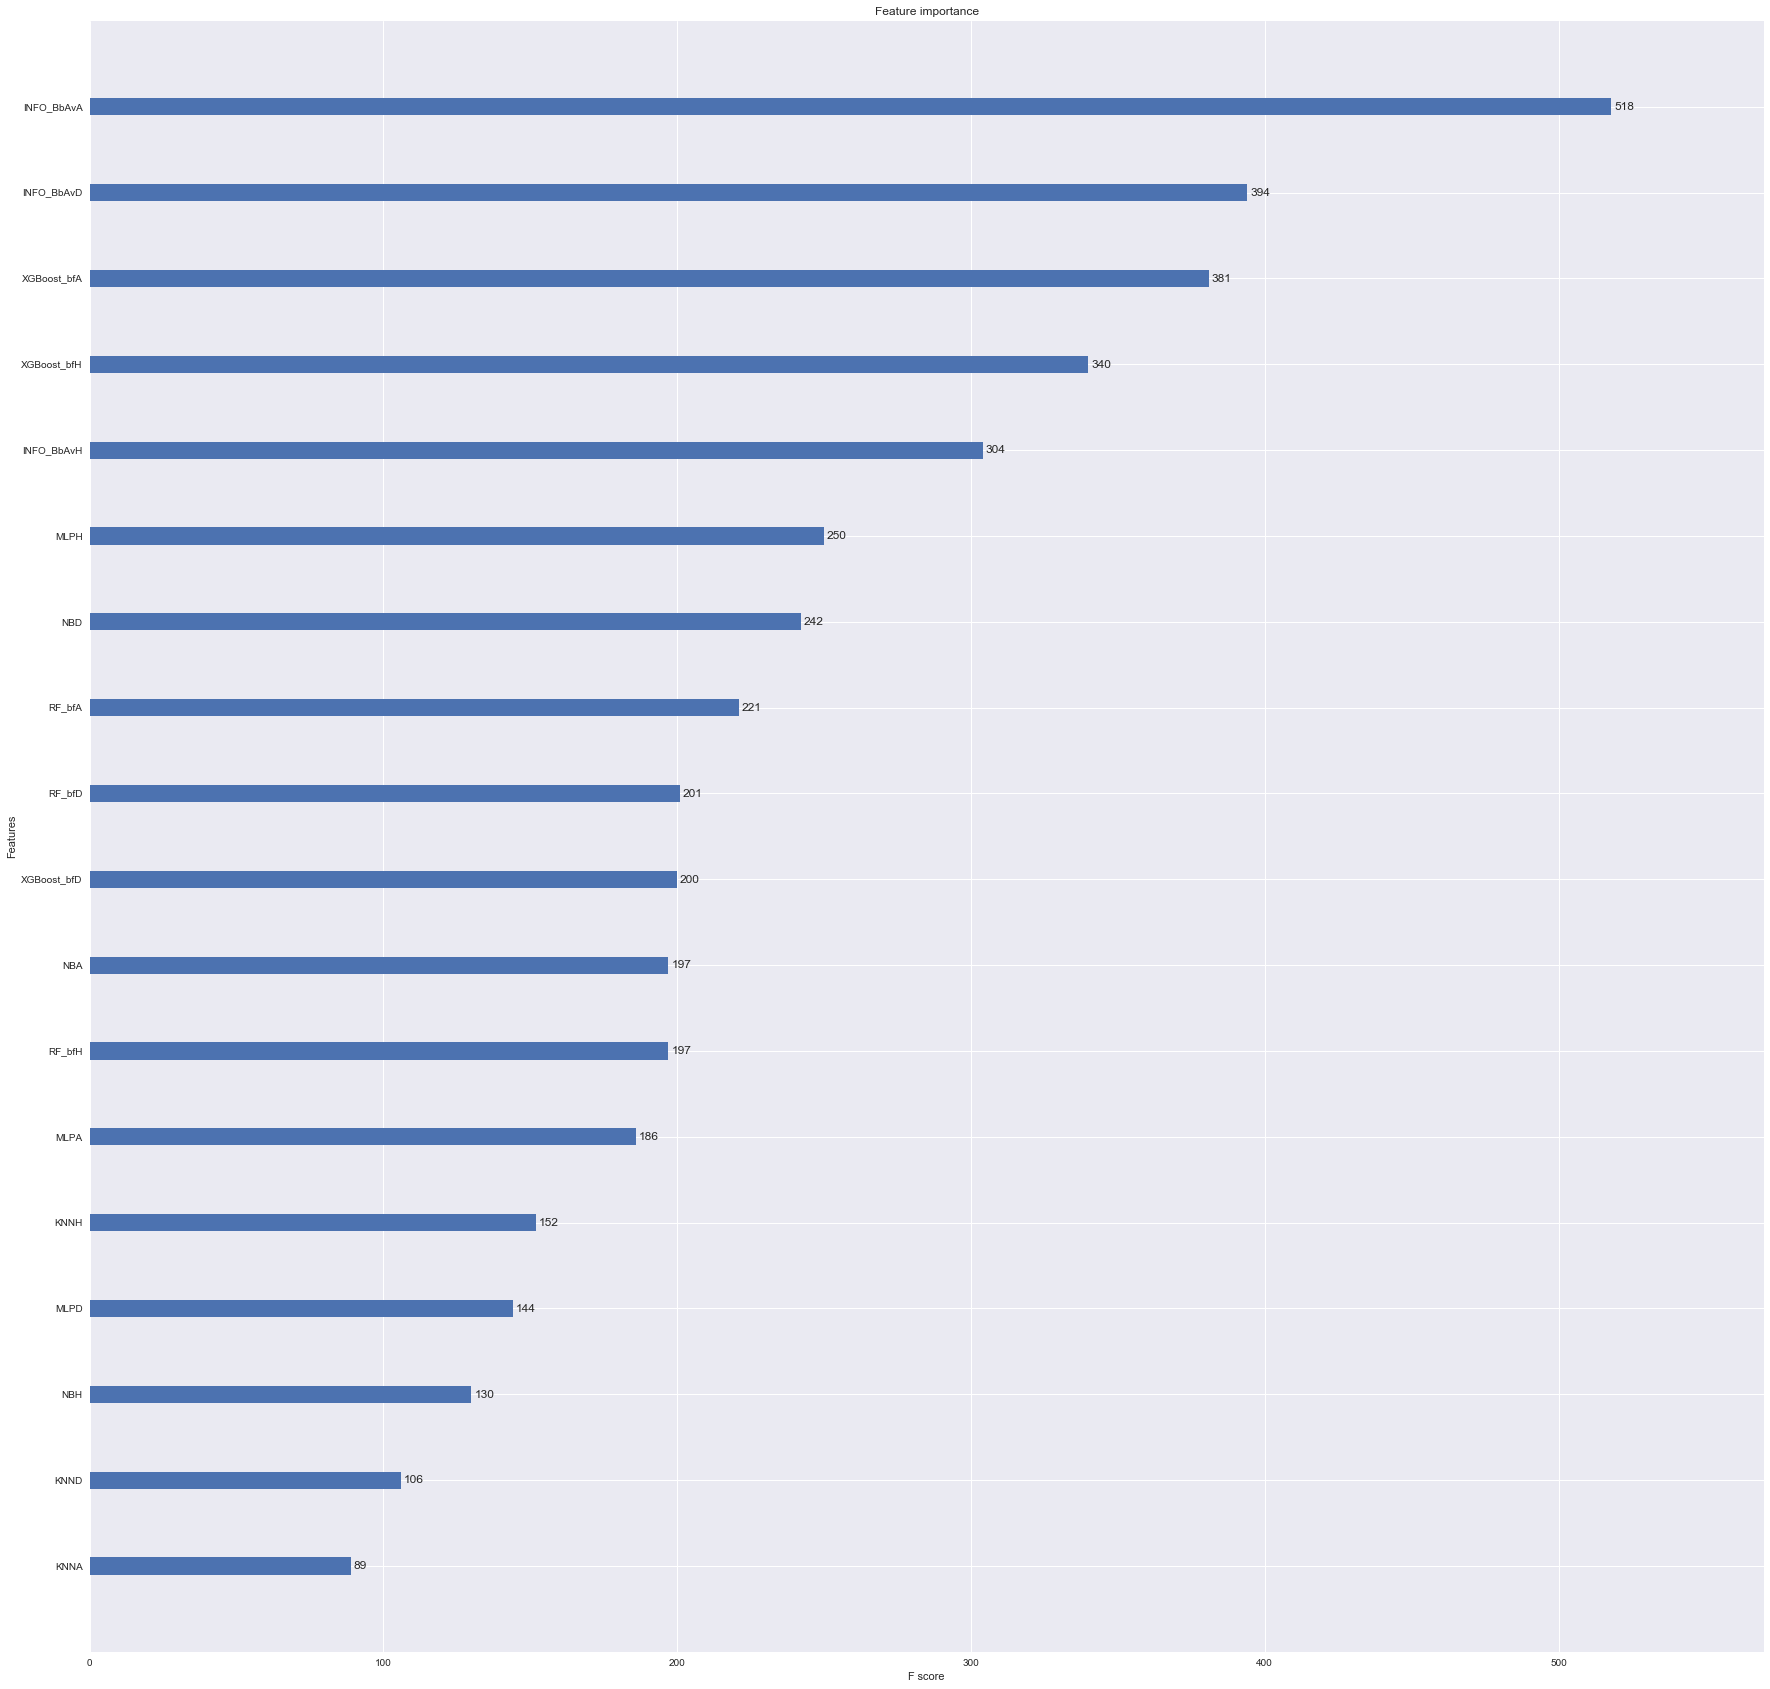

In [44]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# fit model no training data
model = XGBClassifier(
    learning_rate=0.01,
    n_estimators=207,
    max_depth=3,
    min_child_weight=3,
    gamma=0.4,
    subsample=0.65,
    colsample_bytree=0.85,
    objective= 'multi:softprob',
    nthread=4,
    scale_pos_weight=1,
    seed=15)
model.fit(X_layer2_train, y_train_df, eval_metric='logloss')
# plot feature importance
fig, ax = plt.subplots(figsize=(30,30))
plot_importance(model, ax=ax)
pyplot.show()